In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4825,ham,"Haha, just what I was thinkin",NaN,NaN,NaN
1852,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
3608,ham,Joy's father is John. Then John is the ____ of...,NaN,NaN,NaN
1296,ham,Sure! I am driving but will reach my destinati...,NaN,NaN,NaN
2056,ham,.Please charge my mobile when you get up in mo...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
5227,ham,I re-met alex nichols from middle school and i...
5525,ham,I want to tell you how bad I feel that basical...
4816,ham,Me too. Mark is taking forever to pick up my p...
556,ham,Having lunch:)you are not in online?why?
4337,ham,Yes when is the appt again?


In [8]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
3884,ham,Like a personal sized or what
4294,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
5347,ham,No sir. That's why i had an 8-hr trip on the b...
4536,ham,Normally i use to drink more water daily:)
331,ham,Maybe i could get book out tomo then return it...


In [9]:
 from sklearn.preprocessing import LabelEncoder
 encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


checking for missing values

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

checking for duplicates

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

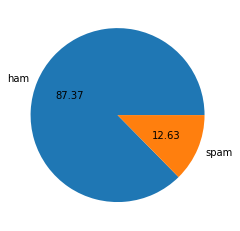

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


In [25]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [26]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [27]:
import seaborn as sns

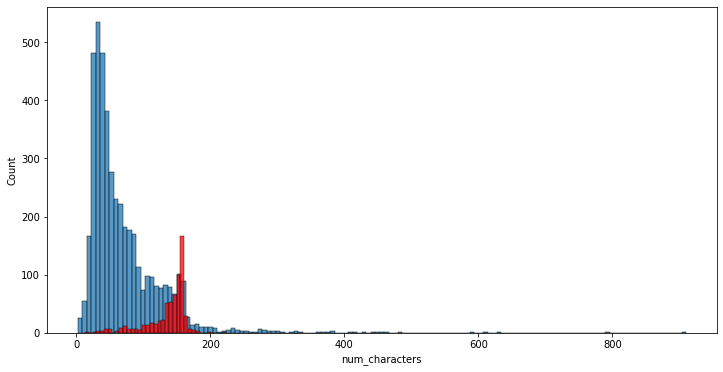

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

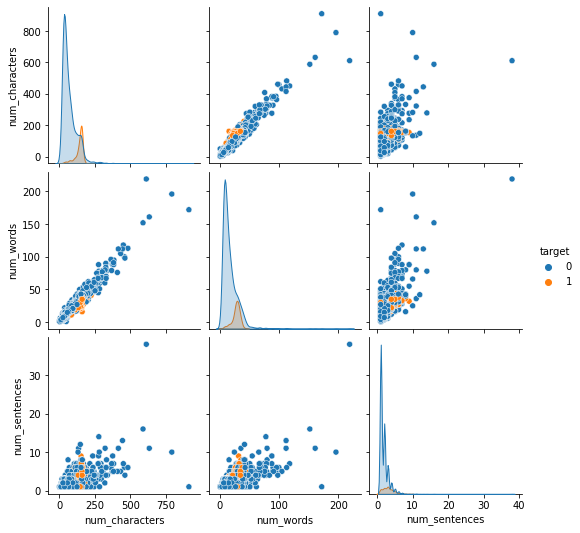

In [29]:
sns.pairplot(df, hue='target')

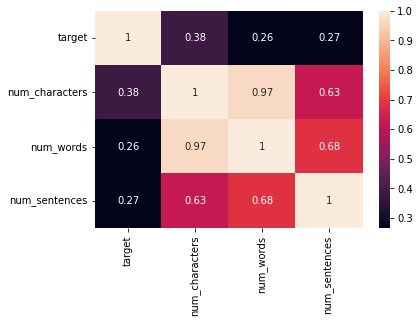

In [30]:
sns.heatmap(df.corr(), annot=True)

# such highly corelated we will consider num_characters

Data Preprocessing


*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming / Lamitization



In [31]:
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

In [33]:
from nltk.corpus import stopwords

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  # retaining only string and alphanumeric characters

  li = []
  for i in text:
    if i.isalnum():
      li.append(i)

  text = li[:]
  li.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      li.append(i)
  
  text = li[:]
  li.clear()

  for i in text:
    li.append(ps.stem(i))
      
  return " ".join(li)

In [34]:
transform_text('hi how ARE YOU Fashad %% ^^ , did you like the machine learning ?')

'hi fashad like machin learn'

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [38]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=''))

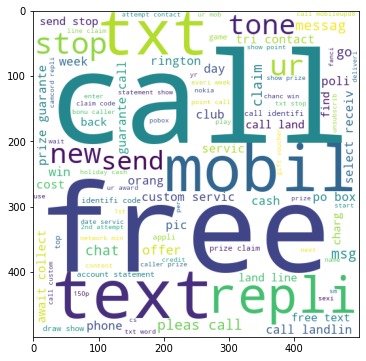

In [39]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=''))

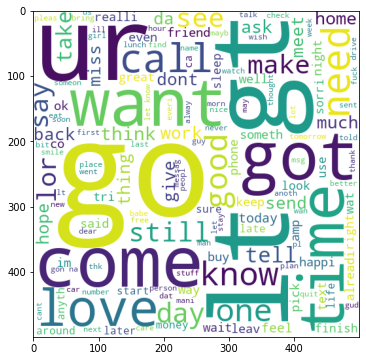

In [41]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [42]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [43]:
len(spam_corpus)

9883

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


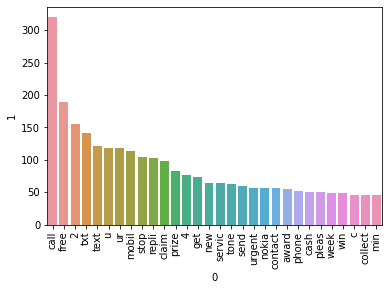

In [44]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [46]:
len(ham_corpus)

34771

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


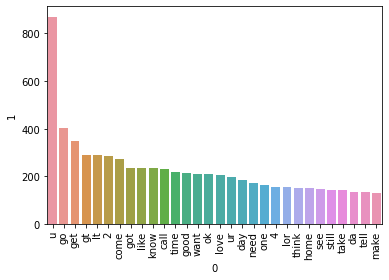

In [47]:

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [49]:
X = tf.fit_transform(df['transformed_text']).toarray()

In [50]:
X.shape
#sent,words

(5169, 6629)

In [51]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [56]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [57]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


since it is imbalanced data,so precision score matters alot

trying out!

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [60]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [62]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print('FOR        : ', name)
    print('Accuracy   : ', current_accuracy)
    print('Precision  : ', current_precision)
    print('\n')
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

FOR        :  SVC
Accuracy   :  0.9729206963249516
Precision  :  0.9661016949152542


FOR        :  KN
Accuracy   :  0.9003868471953579
Precision  :  1.0


FOR        :  NB
Accuracy   :  0.9593810444874274
Precision  :  1.0


FOR        :  DT
Accuracy   :  0.9352030947775629
Precision  :  0.8380952380952381


FOR        :  LR
Accuracy   :  0.9526112185686654
Precision  :  0.9320388349514563


FOR        :  RF
Accuracy   :  0.97678916827853
Precision  :  0.9913793103448276


FOR        :  AdaBoost
Accuracy   :  0.9613152804642167
Precision  :  0.9298245614035088


FOR        :  BgC
Accuracy   :  0.9593810444874274
Precision  :  0.8692307692307693


FOR        :  ETC
Accuracy   :  0.9758220502901354
Precision  :  0.9747899159663865


FOR        :  GBDT
Accuracy   :  0.9516441005802708
Precision  :  0.8928571428571429


FOR        :  xgb
Accuracy   :  0.9506769825918762
Precision  :  0.9142857142857143




In [63]:
performance_df = pd.DataFrame(
    {'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [64]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.976789,0.991379
8,ETC,0.975822,0.974790
0,SVC,0.972921,0.966102
4,LR,0.952611,0.932039
6,AdaBoost,0.961315,0.929825
10,xgb,0.950677,0.914286
9,GBDT,0.951644,0.892857
7,BgC,0.959381,0.869231


In [65]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [66]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.976789
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,LR,Accuracy,0.952611
6,AdaBoost,Accuracy,0.961315
7,xgb,Accuracy,0.950677
8,GBDT,Accuracy,0.951644
9,BgC,Accuracy,0.959381


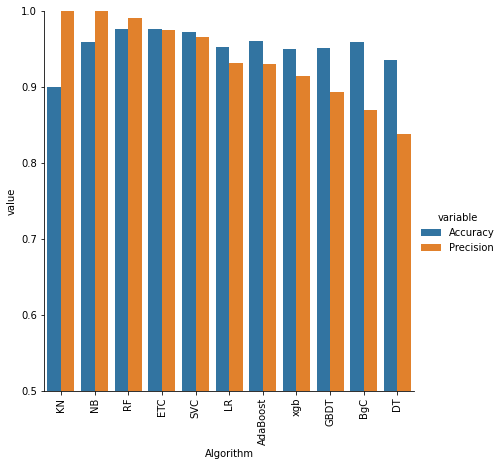

In [67]:
sns.catplot(x='Algorithm', y='value',hue='variable', data=performance_df1, kind='bar', height=6)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

Model Improvement

In [68]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [69]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [70]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [71]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [72]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [73]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,RF,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,ETC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,SVC,0.972921,0.966102,0.972921,0.966102,0.972921,0.966102,0.972921,0.966102
5,LR,0.952611,0.932039,0.952611,0.932039,0.952611,0.932039,0.952611,0.932039
6,AdaBoost,0.961315,0.929825,0.961315,0.929825,0.961315,0.929825,0.961315,0.929825
7,xgb,0.950677,0.914286,0.950677,0.914286,0.950677,0.914286,0.950677,0.914286
8,GBDT,0.951644,0.892857,0.951644,0.892857,0.951644,0.892857,0.951644,0.892857
9,BgC,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231


In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [75]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [76]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=1.0, kernel='sigmoid', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('nb',
                              MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True)),
                             ('et',
                              ExtraTreesClassifier...
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_

In [ ]:
y_pred = voting.predict(X_test)
print('Accuracy', accuracy_score(y_test,y_pred))
print('Precision', precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [80]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9323308270676691


In [82]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))